In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv('scammer_survey_data.csv')

In [21]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,4/17/20 14:23,4/17/20 14:26,0,168.151.100.180,100,207,1,4/17/20 14:26,R_3HLCrMv765B3qLM,NaN,...,7,5,6,6,5,6,7,6,7,6
3,4/17/20 14:23,4/17/20 14:30,0,72.90.152.103,100,419,1,4/17/20 14:30,R_1oHfsxZXAqUS0Ub,NaN,...,7,5,7,4,7,6,7,6,6,6
4,4/17/20 14:25,4/17/20 14:31,0,98.187.130.54,100,318,1,4/17/20 14:31,R_3PsNZfZRlAbS2XF,NaN,...,5,7,5,5,6,5,7,7,6,5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 153 entries, StartDate to int_3
dtypes: object(153)
memory usage: 364.7+ KB


In [23]:
df.describe()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
count,305,305,305,300,305,305,305,305,305,2,...,300,300,299,300,299,299,299,300,300,300
unique,105,111,4,295,4,270,4,111,305,2,...,9,9,9,9,9,9,9,9,9,9
top,4/17/20 14:21,4/17/20 14:30,0,76.125.244.14,100,386,1,4/17/20 14:30,R_3fe1g4iiaBhWZRA,"{""ImportId"":""recipientLastName""}",...,5,5,5,5,1,1,1,1,1,1
freq,19,8,298,2,302,3,302,8,1,1,...,80,75,83,82,58,69,65,136,137,132


In [24]:
#drop default Qualtrics data columns

df = df.drop(['StartDate', 'EndDate', 'Status','IPAddress','Progress','Duration (in seconds)', 'Finished', 'RecordedDate','ResponseId','RecipientLastName','RecipientFirstName','RecipientEmail'], axis=1)

In [25]:
df.head()

,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Consent,Sex,Ethnicity,AgeGroups,Education,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Do you agree to participate in this study?,What is your gender?,What is your ethnicity?,Which of the following age groups do you belon...,What is the highest level of education you hav...,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""externalDataReference""}","{""ImportId"":""locationLatitude""}","{""ImportId"":""locationLongitude""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,NaN,40.7144928,-74.00289917,anonymous,EN,1,2,1,2,3,...,7,5,6,6,5,6,7,6,7,6
3,NaN,40.63569641,-74.25270081,anonymous,EN,1,1,2,2,5,...,7,5,7,4,7,6,7,6,6,6
4,NaN,36.35189819,-94.21970367,anonymous,EN,1,1,4,3,5,...,5,7,5,5,6,5,7,7,6,5


In [26]:
df = df.drop(['ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','UserLanguage'], axis=1)

In [27]:
df.describe()

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
count,301,300,300,300,300,300,300,300,300,299,...,300,300,299,300,299,299,299,300,300,300
unique,4,5,9,8,7,7,7,8,9,9,...,9,9,9,9,9,9,9,9,9,9
top,1,1,3,2,3,3,4,2,5,7,...,5,5,5,5,1,1,1,1,1,1
freq,298,190,193,142,150,99,128,99,80,92,...,80,75,83,82,58,69,65,136,137,132


In [28]:
df.head(10)

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,Do you agree to participate in this study?,What is your gender?,What is your ethnicity?,Which of the following age groups do you belon...,What is the highest level of education you hav...,How much time do you spend online on an average?,What level of computing expertise do you have?,What is your annual income?,How risky do you think it is to indulge the fo...,How risky do you think it is to indulge the fo...,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID6_1""}","{""ImportId"":""QID6_2""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,1,2,1,2,3,3,3,1,6,7,...,7,5,6,6,5,6,7,6,7,6
3,1,1,2,2,5,3,4,3,5,3,...,7,5,7,4,7,6,7,6,6,6
4,1,1,4,3,5,4,3,2,5,4,...,5,7,5,5,6,5,7,7,6,5
5,1,2,3,1,2,5,4,3,7,7,...,7,7,7,7,7,7,7,6,6,4
6,1,1,2,2,5,5,3,2,4,5,...,6,5,7,5,7,5,7,4,5,5
7,1,1,3,2,5,2,5,4,4,5,...,6,4,4,2,7,2,7,5,4,5
8,1,2,1,2,5,3,1,3,7,6,...,7,6,7,6,7,6,7,5,5,4
9,1,1,6,2,3,5,4,2,6,7,...,7,5,6,6,7,6,7,1,1,1


In [29]:
df

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,Do you agree to participate in this study?,What is your gender?,What is your ethnicity?,Which of the following age groups do you belon...,What is the highest level of education you hav...,How much time do you spend online on an average?,What level of computing expertise do you have?,What is your annual income?,How risky do you think it is to indulge the fo...,How risky do you think it is to indulge the fo...,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID6_1""}","{""ImportId"":""QID6_2""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,1,2,1,2,3,3,3,1,6,7,...,7,5,6,6,5,6,7,6,7,6
3,1,1,2,2,5,3,4,3,5,3,...,7,5,7,4,7,6,7,6,6,6
4,1,1,4,3,5,4,3,2,5,4,...,5,7,5,5,6,5,7,7,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#drop any rows where consent was not given
df[df['Consent']=='2']
df = df.drop(axis=0, index=303, level=None, inplace=False, errors='raise')

In [31]:
#Check if it was dropped
df[df['Consent']=='2']

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3


In [32]:
#check df again, because there were some NaN values
df

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
0,Do you agree to participate in this study?,What is your gender?,What is your ethnicity?,Which of the following age groups do you belon...,What is the highest level of education you hav...,How much time do you spend online on an average?,What level of computing expertise do you have?,What is your annual income?,How risky do you think it is to indulge the fo...,How risky do you think it is to indulge the fo...,...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...,Imagine the following scenario:\nYou are selli...
1,"{""ImportId"":""QID1""}","{""ImportId"":""QID2""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4""}","{""ImportId"":""QID5""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID6_1""}","{""ImportId"":""QID6_2""}",...,"{""ImportId"":""QID27_6""}","{""ImportId"":""QID27_7""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}","{""ImportId"":""QID27_11""}","{""ImportId"":""QID27_12""}","{""ImportId"":""QID27_8""}","{""ImportId"":""QID27_9""}","{""ImportId"":""QID27_10""}"
2,1,2,1,2,3,3,3,1,6,7,...,7,5,6,6,5,6,7,6,7,6
3,1,1,2,2,5,3,4,3,5,3,...,7,5,7,4,7,6,7,6,6,6
4,1,1,4,3,5,4,3,2,5,4,...,5,7,5,5,6,5,7,7,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#drop them because they haven't even answered the basic questions and also drop the header rows 0-1
df = df.drop( axis=0, index=[0,1,299,300,301,302,299], level=None, inplace=False, errors='raise')

In [36]:
#the values in df are all string values, convert them to numerics
my_list = list(df)

df_2 = pd.DataFrame()
for i in my_list:
    df_2[i] = pd.to_numeric(df[i])

In [37]:
df_2

,Consent,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,risk1,risk2,...,opp_3,cap_1,cap_2,cap_3,rat_1,rat_2,rat_3,int_1,int_2,int_3
2,1,2,1,2,3,3,3,1,6,7.0,...,7,5,6.0,6,5.0,6.0,7.0,6,7,6
3,1,1,2,2,5,3,4,3,5,3.0,...,7,5,7.0,4,7.0,6.0,7.0,6,6,6
4,1,1,4,3,5,4,3,2,5,4.0,...,5,7,5.0,5,6.0,5.0,7.0,7,6,5
5,1,2,3,1,2,5,4,3,7,7.0,...,7,7,7.0,7,7.0,7.0,7.0,6,6,4
6,1,1,2,2,5,5,3,2,4,5.0,...,6,5,7.0,5,7.0,5.0,7.0,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,3,4,2,3,4,1,3,5.0,...,5,5,5.0,5,1.0,1.0,1.0,1,1,1
296,1,1,3,2,2,3,4,1,6,7.0,...,5,5,5.0,5,1.0,1.0,1.0,1,1,1
297,1,2,3,5,2,5,5,6,6,7.0,...,6,7,7.0,6,1.0,1.0,1.0,1,1,1
298,1,1,3,6,3,5,4,1,7,7.0,...,5,5,5.0,5,1.0,1.0,1.0,5,4,5


In [38]:
#easier to see all columns by using next statement
print(my_list)

['Consent', 'Sex', 'Ethnicity', 'AgeGroups', 'Education', 'OnlineTime', 'CompExpert', 'Income', 'risk1', 'risk2', 'risk3', 'risk4', 'risk5', 'risk6', 'risk_filler', 'risk_f1', 'risk_f2', 'risk_f3', 'risk_f4', 'risk_f5', 'risk_f6', 'mach1', 'mach2', 'mach3', 'mach4', 'mach5', 'mach6', 'mach7', 'mach8', 'mach9', 'mach10', 'psych1', 'Rpsych2', 'psych3', 'psych4', 'psych5', 'psych6', 'psych7', 'Select_Agree_4', 'Rpsych8', 'psych9', 'psych10', 'psych11', 'psych12', 'psych13', 'risk_s1', 'risk_s2', 'risk_s3', 'risk_s4', 'risk_s5', 'risk_s6', 'CCRI1', 'CCRI2', 'CCRI3', 'CCRI4', 'CCRI5', 'CCRI6', 'CCRI7', 'CCRI8', 'CCRI9', 'CCRI10', 'CCRI11', 'narc_1', 'Rnarc_2', 'narc_3', 'narc_4', 'narc_5', 'Rnarc_6', 'narc_7', 'Rnarc_8', 'narc_9', 'CCRI12', 'CCRI13', 'CCRI14', 'CCRI15', 'CCRI16', 'CCRI17', 'CCRI18', 'CCRI19', 'CCRI20', 'CCRI21', 'soc_p1', 'R_soc_ipc1', 'soc_s1', 'soc_p2', 'soc_ipc2', 'soc_s2', 'R_soc_p3', 'R_soc_ipc3', 'R_soc_s3', 'soc_p4', 'soc_ipc4', 'R_soc_s4', 'soc_p5', 'soc_ipc5', 'soc

In [39]:
#calculate average risk perception for each person
risk_cols = ['risk1', 'risk2', 'risk3', 'risk4', 'risk5', 'risk6', 'risk_f1', 'risk_f2', 'risk_f3', 'risk_f4', 'risk_f5', 'risk_f6', 'risk_s1', 'risk_s2', 'risk_s3', 'risk_s4', 'risk_s5', 'risk_s6']
df_2['Risk_Total'] = df_2[risk_cols].mean(axis=1,skipna=True)

In [40]:
df_2['Risk_Total']
df['Rpsych8']

2      5
3      3
4      5
5      2
6      3
      ..
295    1
296    5
297    5
298    4
304    5
Name: Rpsych8, Length: 298, dtype: object

In [41]:
#Calculate average of Dark Triad Traits for every person
df_2['Mach_Total'] = df_2[['mach1', 'mach2', 'mach3', 'mach4', 'mach5', 'mach6', 
                           'mach7', 'mach8', 'mach9', 'mach10']].mean(axis=1, skipna=True)

#Notice that Psychopathy has some labels R_psych which indicate that it has been reverse coded. So, subtract 5 from each observation (Refer to Scale)
df_2['Rpsych2'] = 5- df_2['Rpsych2']
df_2['Rpsych8'] = 5- df_2['Rpsych8']
df_2['Psych_Total'] = df_2[['psych1', 'Rpsych2', 'psych3', 'psych4', 'psych5', 'psych6', 
                            'psych7', 'Rpsych8', 'psych9', 'psych10', 'psych11', 'psych12', 'psych13']].mean(axis=1, skipna=True)

#Do the same for narcissism 
df_2['Rnarc_2'] = 5 - df_2['Rnarc_2']
df_2['Rnarc_6'] = 5 - df_2['Rnarc_6']
df_2['Rnarc_8'] = 5 - df_2['Rnarc_8']
df_2['Narc_Total'] = df_2[['narc_1', 'Rnarc_2', 'narc_3', 'narc_4', 'narc_5', 'Rnarc_6', 
                           'narc_7', 'Rnarc_8', 'narc_9']].mean(axis=1,skipna=True)

In [42]:
#Find Total for CCRI
df_2['Total_CCRI'] = df_2[['CCRI1', 'CCRI2', 'CCRI3', 'CCRI4', 'CCRI5', 'CCRI6', 
                           'CCRI7', 'CCRI8', 'CCRI9', 'CCRI10','CCRI11', 'CCRI12', 
                           'CCRI13','CCRI14','CCRI15','CCRI16','CCRI17', 'CCRI18', 
                           'CCRI19','CCRI20','CCRI21','CCRI22','CCRI23', 'CCRI24',
                           'CCRI25','CCRI26','CCRI27','CCRI28','CCRI29', 'CCRI30']].sum(axis=1, skipna=True)

In [43]:
#Spheres of Control Part

#personal_control - fix the reverse coded values
df_2['R_soc_p3'] = 7 - df_2['R_soc_p3']
df_2['R_soc_p6'] = 7 - df_2['R_soc_p6']
df_2['R_soc_p7'] = 7 - df_2['R_soc_p7']
df_2['R_soc_p9'] = 7 - df_2['R_soc_p9']
df_2['R_soc_p10'] = 7 - df_2['R_soc_p10']

#calculate the mean
df_2['SOC_pers'] = df_2[['soc_p1', 'soc_p2', 'R_soc_p3','soc_p4', 
                            'soc_p5', 'R_soc_p6', 'R_soc_p7','soc_p7','R_soc_p9','R_soc_p10']].mean(axis=1,skipna=True)

#interpersonal control - fix reverse coded values
df_2['R_soc_ipc1'] = 7 - df_2['R_soc_ipc1']
df_2['R_soc_ipc3'] = 7 - df_2['R_soc_ipc3']
df_2['R_soc_ipc6'] = 7 - df_2['R_soc_ipc6']
df_2['R_soc_ipc8'] = 7 - df_2['R_soc_ipc8']
df_2['R_soc_ipc9'] = 7 - df_2['R_soc_ipc9']

#calculate the mean
df_2['SOC_ipc'] = df_2[['R_soc_ipc1', 'soc_ipc2', 'R_soc_ipc3', 'soc_ipc4', 'soc_ipc5', 
                        'R_soc_ipc6', 'soc_ipc7', 'R_soc_ipc8',  'R_soc_ipc9','soc_ipc10']].mean(axis=1,skipna=True)

#Socio-political control - fix reverse coded values
df_2['R_soc_s9'] = 7 - df_2['R_soc_s9']
df_2['R_soc_s8'] = 7 - df_2['R_soc_s8']
df_2['R_soc_s7'] = 7 - df_2['R_soc_s7']
df_2['R_soc_s4'] = 7 - df_2['R_soc_s4']
df_2['R_soc_s3'] = 7 - df_2['R_soc_s3']

#calculate the mean
df_2['SOC_spc'] = df_2[['soc_s1','soc_s2','R_soc_s3','R_soc_s4', 'soc_s5',
                        'soc_s6', 'R_soc_s7', 'R_soc_s8','R_soc_s9', 'soc_10']].mean(axis=1,skipna=True)

In [44]:
#Fraud Diamond Elements and Intent

df_2['Motivation'] = df_2[['mot_1', 'mot_2', 'mot_3']].mean(axis=1, skipna=True)
df_2['Opportunity'] = df_2[['opp_1', 'opp_2', 'opp_3']].mean(axis=1,skipna=True)
df_2['Capability'] = df_2[['cap_1', 'cap_2', 'cap_3']].mean(axis=1,skipna=True)
df_2['Rationalization'] = df_2[['rat_1', 'rat_2', 'rat_3']].mean(axis=1,skipna=True)
df_2['Intent'] = df_2[['int_1', 'int_2', 'int_3']].mean(axis=1,skipna=True)

In [46]:
df_2 = df_2.drop(['Consent','risk1', 'risk2', 'risk3', 'risk4', 'risk5', 'risk6', 'risk_filler', 'risk_f1', 'risk_f2', 'risk_f3', 'risk_f4', 'risk_f5', 'risk_f6', 'mach1', 'mach2', 'mach3', 'mach4', 'mach5', 'mach6', 'mach7', 'mach8', 'mach9', 'mach10', 'psych1', 'Rpsych2', 'psych3', 'psych4', 'psych5', 'psych6', 'psych7', 'Select_Agree_4', 'Rpsych8', 'psych9', 'psych10', 'psych11', 'psych12', 'psych13', 'risk_s1', 'risk_s2', 'risk_s3', 'risk_s4', 'risk_s5', 'risk_s6', 'CCRI1', 'CCRI2', 'CCRI3', 'CCRI4', 'CCRI5', 'CCRI6', 'CCRI7', 'CCRI8', 'CCRI9', 'CCRI10', 'CCRI11', 'narc_1', 'Rnarc_2', 'narc_3', 'narc_4', 'narc_5', 'Rnarc_6', 'narc_7', 'Rnarc_8', 'narc_9', 'CCRI12', 'CCRI13', 'CCRI14', 'CCRI15', 'CCRI16', 'CCRI17', 'CCRI18', 'CCRI19', 'CCRI20', 'CCRI21', 'soc_p1', 'R_soc_ipc1', 'soc_s1', 'soc_p2', 'soc_ipc2', 'soc_s2', 'R_soc_p3', 'R_soc_ipc3', 'R_soc_s3', 'soc_p4', 'soc_ipc4', 'R_soc_s4', 'soc_p5', 'soc_ipc5', 'soc_s5', 'CCRI22', 'CCRI23', 'CCRI24', 'CCRI25', 'CCRI26', 'CCRI27', 'CCRI28', 'CCRI29', 'CCRI30', 'R_soc_p6', 'R_soc_ipc6', 'soc_s6', 'R_soc_p7', 'soc_ipc7', 'R_soc_s7', 'soc_p7', 'R_soc_ipc8', 'R_soc_s8', 'R_soc_p9', 'R_soc_ipc9', 'R_soc_s9', 'R_soc_p10', 'Attention_Check_4', 'soc_10', 'soc_ipc10', 'mot_1', 'mot_2', 'mot_3', 'opp_1', 'opp_2', 'opp_3', 'cap_1', 'cap_2', 'cap_3', 'rat_1', 'rat_2', 'rat_3', 'int_1', 'int_2', 'int_3'], axis=1)

In [47]:
df_2.head()

,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,Risk_Total,Mach_Total,Psych_Total,Narc_Total,Total_CCRI,SOC_pers,SOC_ipc,SOC_spc,Motivation,Opportunity,Capability,Rationalization,Intent
2,2,1,2,3,3,3,1,5.777778,4.111111,4.076923,2.750000,205.0,3.1,3.1,3.300000,6.333333,6.333333,5.666667,6.000000,7.000000
3,1,2,2,5,3,4,3,4.888889,3.800000,3.846154,2.555556,204.0,3.7,2.8,3.600000,5.333333,6.333333,5.333333,6.666667,7.000000
4,1,4,3,5,4,3,2,5.444444,4.000000,3.307692,2.666667,207.0,3.1,4.1,2.888889,5.333333,5.666667,5.666667,6.000000,7.000000
5,2,3,1,2,5,4,3,4.166667,4.200000,2.538462,4.666667,221.0,6.1,6.1,3.700000,7.000000,7.000000,7.000000,7.000000,7.000000
6,1,2,2,5,5,3,2,5.500000,4.200000,4.076923,3.555556,193.0,3.5,3.7,3.500000,6.000000,6.000000,5.666667,6.333333,6.333333


In [48]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 2 to 304
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              298 non-null    int64  
 1   Ethnicity        298 non-null    int64  
 2   AgeGroups        298 non-null    int64  
 3   Education        298 non-null    int64  
 4   OnlineTime       298 non-null    int64  
 5   CompExpert       298 non-null    int64  
 6   Income           298 non-null    int64  
 7   Risk_Total       298 non-null    float64
 8   Mach_Total       298 non-null    float64
 9   Psych_Total      298 non-null    float64
 10  Narc_Total       298 non-null    float64
 11  Total_CCRI       298 non-null    float64
 12  SOC_pers         298 non-null    float64
 13  SOC_ipc          298 non-null    float64
 14  SOC_spc          298 non-null    float64
 15  Motivation       298 non-null    float64
 16  Opportunity      298 non-null    float64
 17  Capability      

In [49]:
df_2.corr()

,Sex,Ethnicity,AgeGroups,Education,OnlineTime,CompExpert,Income,Risk_Total,Mach_Total,Psych_Total,Narc_Total,Total_CCRI,SOC_pers,SOC_ipc,SOC_spc,Motivation,Opportunity,Capability,Rationalization,Intent
Sex,1.000000,0.046051,0.022443,-0.071431,0.046730,-0.078173,-0.077496,0.105493,-0.045267,-0.172757,-0.069162,0.199207,0.085280,0.107109,-0.016278,0.027420,0.025790,-0.054996,-0.131913,-0.102455
Ethnicity,0.046051,1.000000,0.003497,-0.053054,0.007058,-0.044443,0.004641,-0.069101,-0.007805,-0.035015,-0.052427,0.019883,0.069766,0.018100,-0.028440,0.017211,-0.041313,-0.077581,-0.028120,0.041269
AgeGroups,0.022443,0.003497,1.000000,-0.012003,0.084570,0.036911,0.025867,-0.016612,-0.155794,-0.197410,-0.101558,0.080839,0.054631,0.130243,-0.055605,-0.078246,-0.019178,-0.067521,-0.176369,-0.137721
Education,-0.071431,-0.053054,-0.012003,1.000000,-0.204571,0.043660,0.293528,0.101926,0.174293,0.299381,0.199193,-0.264495,-0.093325,-0.079003,0.079994,0.062966,0.074343,0.078360,0.258959,0.168666
OnlineTime,0.046730,0.007058,0.084570,-0.204571,1.000000,0.280047,-0.090078,-0.012563,-0.155320,-0.395161,-0.263211,0.373703,0.186182,0.043378,-0.074358,0.058639,-0.012671,-0.088830,-0.303559,-0.263207
CompExpert,-0.078173,-0.044443,0.036911,0.043660,0.280047,1.000000,0.095958,-0.021249,-0.062675,-0.176161,-0.024239,0.249824,0.209194,0.125260,0.109342,-0.005279,-0.071551,-0.007590,-0.086787,-0.089678
Income,-0.077496,0.004641,0.025867,0.293528,-0.090078,0.095958,1.000000,0.067744,0.149864,0.101175,0.211211,-0.072469,0.064314,0.057535,0.115385,0.074337,0.049753,0.095648,0.123472,0.074041
Risk_Total,0.105493,-0.069101,-0.016612,0.101926,-0.012563,-0.021249,0.067744,1.000000,0.298322,0.280382,0.128929,-0.171349,-0.110432,-0.108907,0.008514,0.110825,0.238471,0.189266,0.284264,0.319268
Mach_Total,-0.045267,-0.007805,-0.155794,0.174293,-0.155320,-0.062675,0.149864,0.298322,1.000000,0.628595,0.540055,-0.327703,-0.231699,-0.150224,-0.034570,0.429817,0.394997,0.505249,0.547233,0.466792
Psych_Total,-0.172757,-0.035015,-0.197410,0.299381,-0.395161,-0.176161,0.101175,0.280382,0.628595,1.000000,0.609733,-0.693630,-0.477881,-0.286791,0.014409,0.286670,0.299801,0.426214,0.716516,0.608013


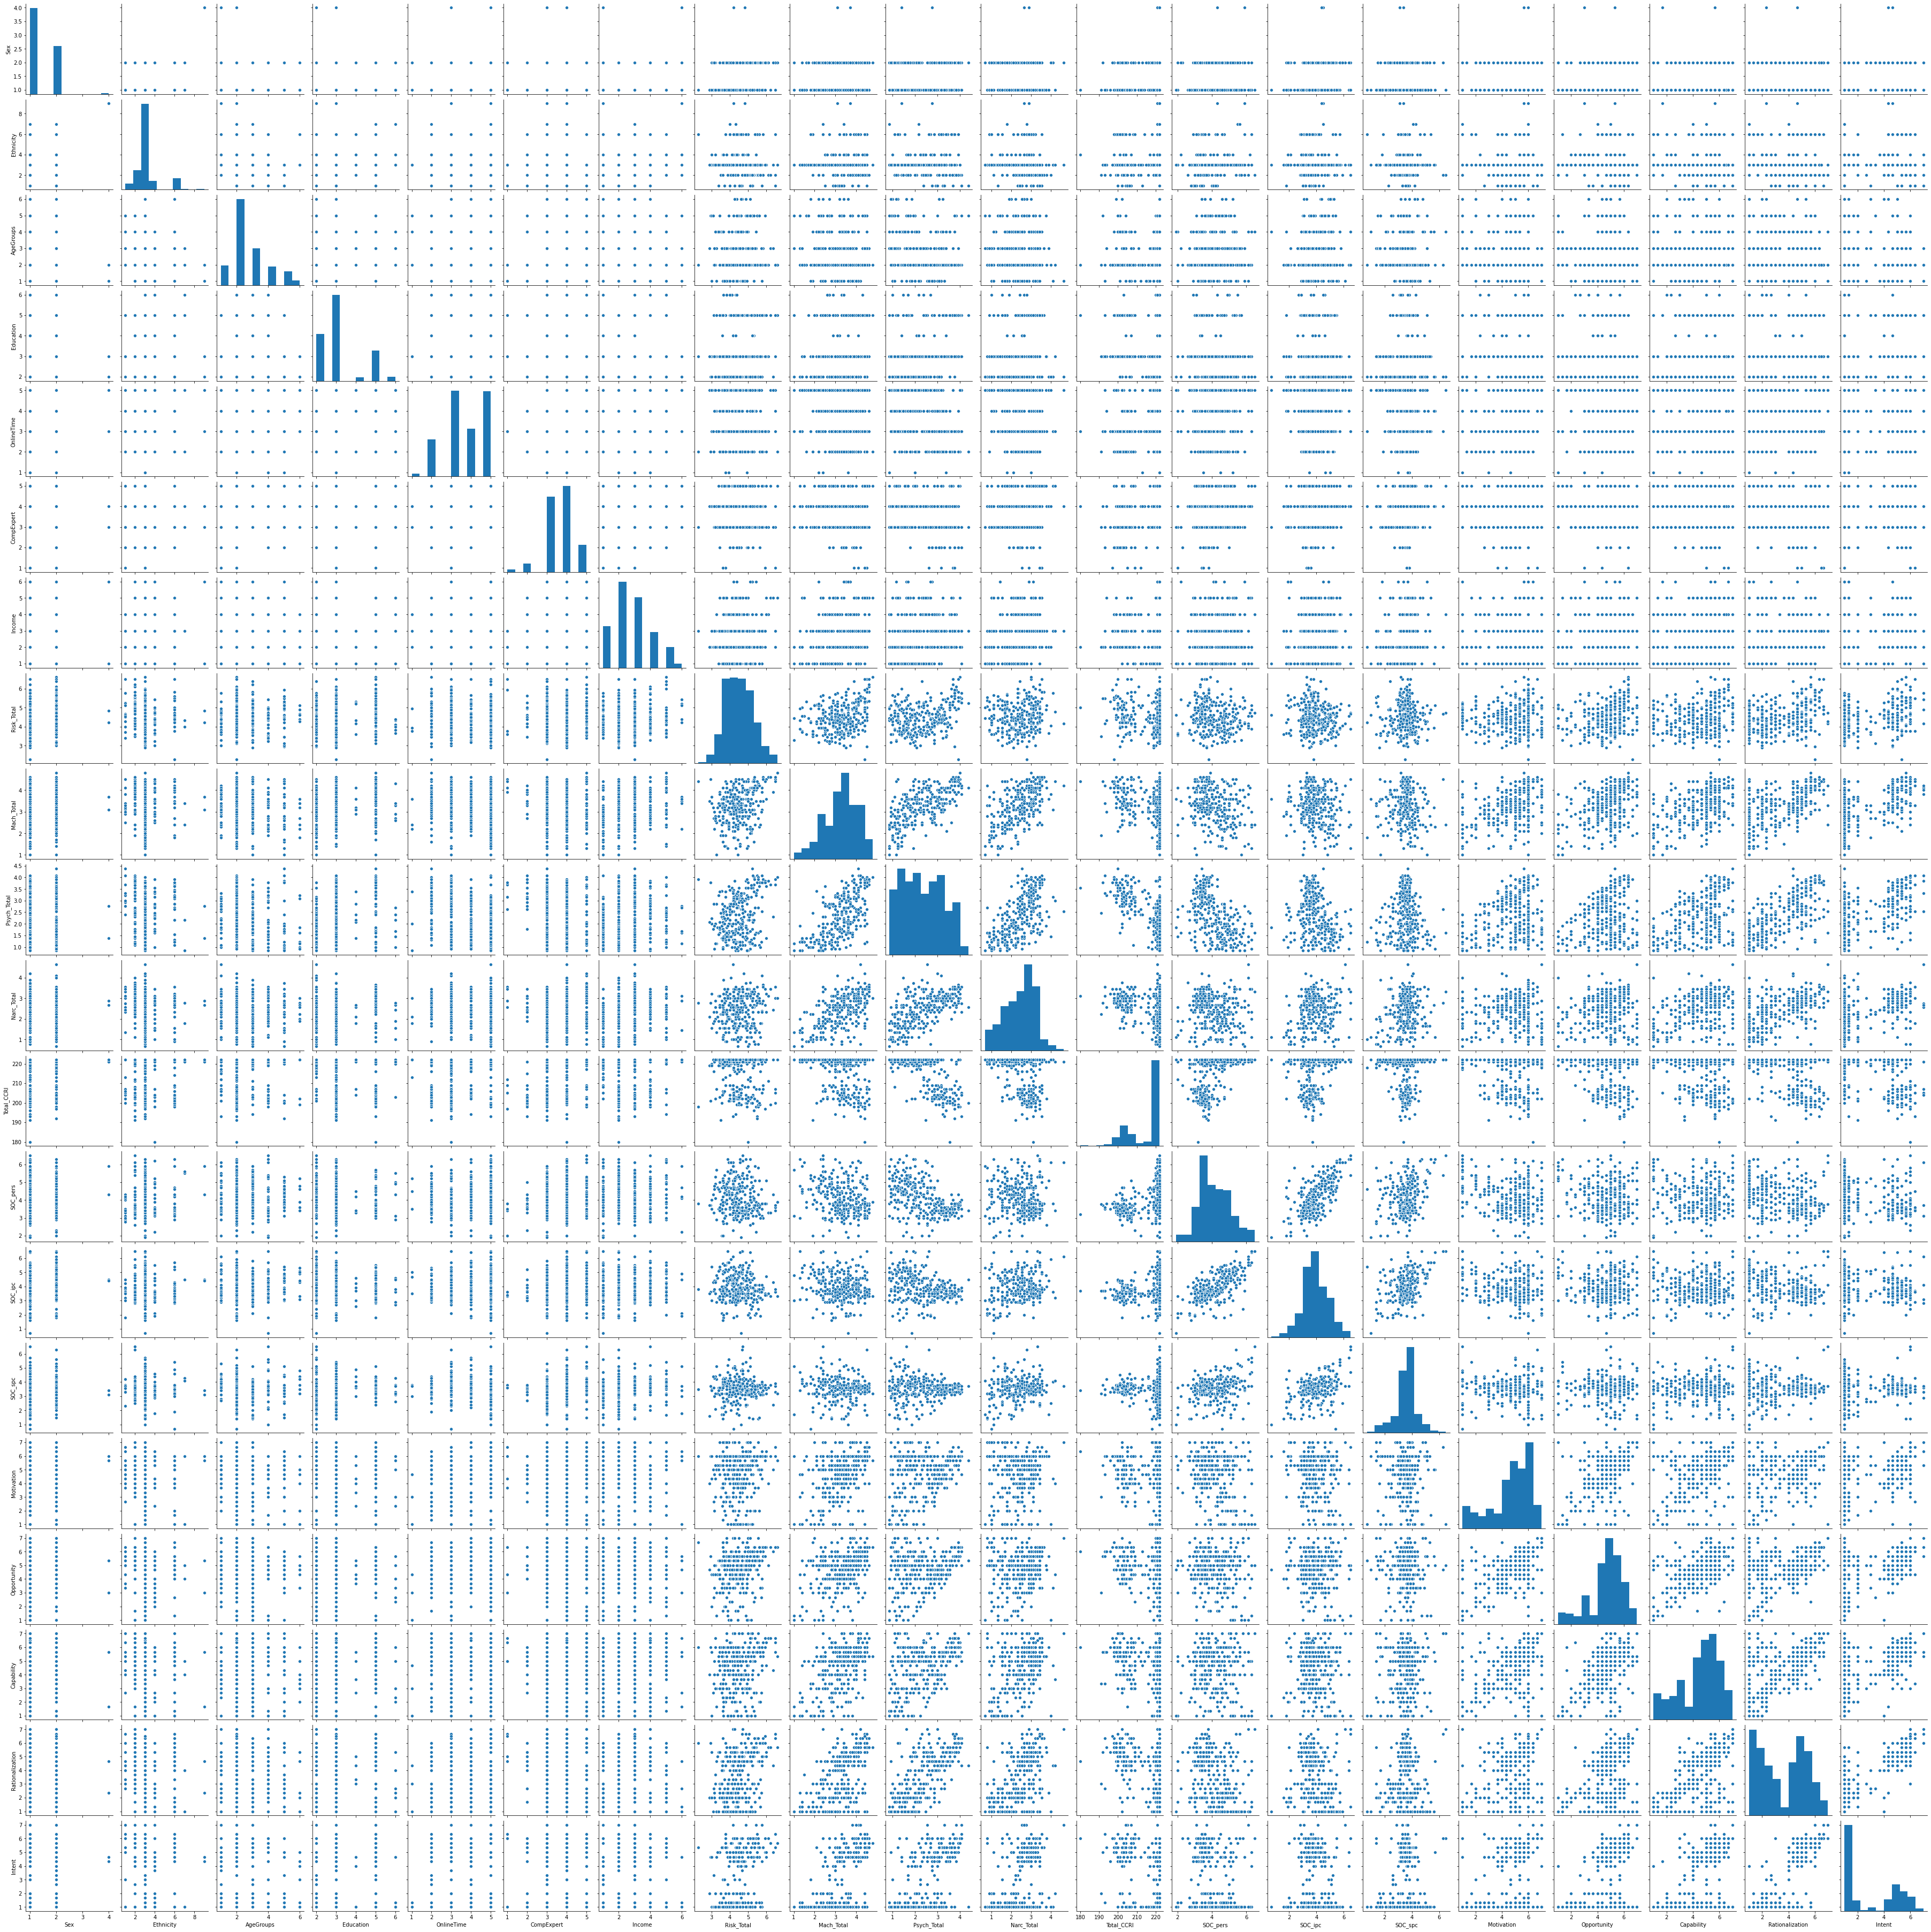

In [50]:
sns.pairplot(df_2).figsize=(50,50)  
#Takes time

In [51]:
#Let's create a categorical variable called "Cyber-Scammer or Not"
#However, Qualtrics messed up the coding for these variables, so we will need to do something tricky here
#CCRI1 - CCRI11 : 1 - Yes, 2 - No 
#CCRI12 - CCRI21: 1 - Yes, 2 - No
#CCRI22 - CCRI30: 19 - Yes, 20 - No
#So if someone has almost never indulged in cyberscamming, we shall have their row sum = (2*21 + 9*20) -1 = 221
#Others should be labelled as non-cyberscammers

df_2.loc[(df_2.Total_CCRI < 221), 'Total_CCRI']= 1
df_2.loc[(df_2.Total_CCRI >= 221),'Total_CCRI']= 0
df_2['Total_CCRI'].value_counts()

#Here, if Total_CCRI == 0 then they are NOT classified as cyberscammers.

0.0    155
1.0    143
Name: Total_CCRI, dtype: int64

In [52]:
df_2.loc[(df_2.Total_CCRI == 1), 'CS_vs_Non']= 'CyberScammer'
df_2.loc[(df_2.Total_CCRI == 0),'CS_vs_Non']= 'Non-CyberScammer'
df_2['CS_vs_Non'].value_counts()

Non-CyberScammer    155
CyberScammer        143
Name: CS_vs_Non, dtype: int64

Preason Correlation and p-value =  (-0.15022386435714918, 0.009400870655371983)
R^2 -  0.022567209422395207
Regression Coefficients: [[-0.12859951]]


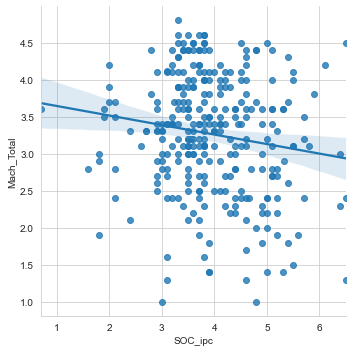

In [53]:
#Hypothesis Testing:
#H1. A. Machiavellianism will have a positive relation with interpersonal control.

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Mach_Total']), y=np.asarray(df_2['SOC_ipc'])))
sns.set_style('whitegrid')
sns.lmplot(x='SOC_ipc',y='Mach_Total',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['SOC_ipc']).reshape(-1,1), np.asarray(df_2['Mach_Total']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['SOC_ipc']).reshape(-1,1), np.asarray(df_2['Mach_Total']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (-0.03457034452968579, 0.5522136566773052)
R^2 -  0.001195108720901339
Regression Coefficients: [[-0.03527104]]


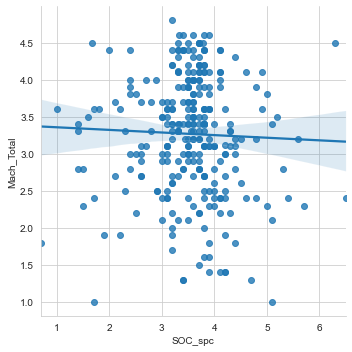

In [54]:
#H1. B. Machiavellianism will have a negative relation with socio-political control.

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Mach_Total']), y=np.asarray(df_2['SOC_spc'])))
sns.set_style('whitegrid')
sns.lmplot(x='SOC_spc',y='Mach_Total',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['SOC_spc']).reshape(-1,1), np.asarray(df_2['Mach_Total']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['SOC_spc']).reshape(-1,1), np.asarray(df_2['Mach_Total']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (0.29832248169942227, 1.5360379785344648e-07)
R^2 -  0.08899630308730233
Regression Coefficients: [[0.28090466]]


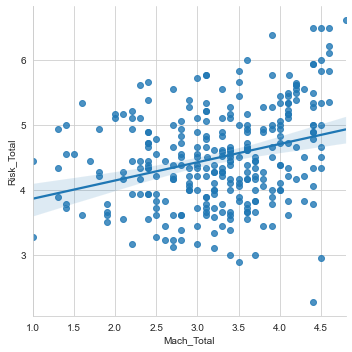

In [55]:
#H2. A. Perceived risk will be negatively related with Machiavellianism

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Mach_Total']), y=np.asarray(df_2['Risk_Total'])))
sns.set_style('whitegrid')
sns.lmplot(x='Mach_Total',y='Risk_Total',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['Mach_Total']).reshape(-1,1), np.asarray(df_2['Risk_Total']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['Mach_Total']).reshape(-1,1), np.asarray(df_2['Risk_Total']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (0.2803816461808219, 8.707180443878014e-07)
R^2 -  0.07861386751506771
Regression Coefficients: [[0.23369315]]


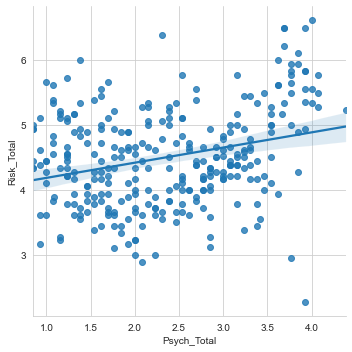

In [56]:
#H2. B. Perceived risk will be negatively related with Psychopathy

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Psych_Total']), y=np.asarray(df_2['Risk_Total'])))
sns.set_style('whitegrid')
sns.lmplot(x='Psych_Total',y='Risk_Total',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['Psych_Total']).reshape(-1,1), np.asarray(df_2['Risk_Total']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['Psych_Total']).reshape(-1,1), np.asarray(df_2['Risk_Total']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (0.23847081003597917, 3.1893369868283314e-05)
R^2 -  0.05686832723921609
Regression Coefficients: [[0.415968]]


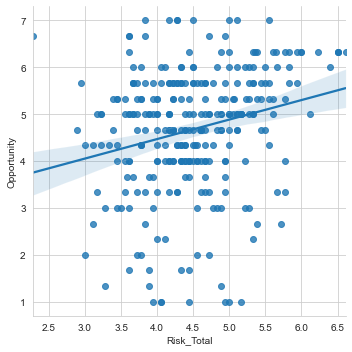

In [57]:
#H2. C. Perceived risk will be positively related to the scammers perceived opportunity to commit scams.

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Risk_Total']), y=np.asarray(df_2['Opportunity'])))
sns.set_style('whitegrid')
sns.lmplot(x='Risk_Total',y='Opportunity',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['Risk_Total']).reshape(-1,1), np.asarray(df_2['Opportunity']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['Risk_Total']).reshape(-1,1), np.asarray(df_2['Opportunity']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (0.23847081003597917, 3.1893369868283314e-05)
R^2 -  0.05686832723921609
Regression Coefficients: [[0.415968]]


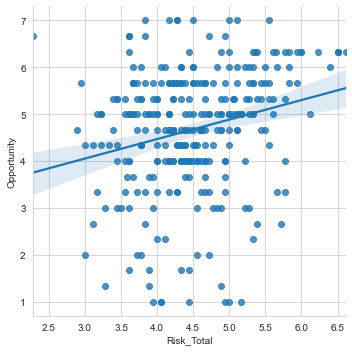

In [58]:
#H3. A. Narcissism will be positively related to perceived capabilities of the individual H3. B. Narcissism will be positively related to motivation of the individual

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Risk_Total']), y=np.asarray(df_2['Opportunity'])))
sns.set_style('whitegrid')
sns.lmplot(x='Risk_Total',y='Opportunity',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['Risk_Total']).reshape(-1,1), np.asarray(df_2['Opportunity']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['Risk_Total']).reshape(-1,1), np.asarray(df_2['Opportunity']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (0.3949972310103023, 1.4411918014787544e-12)
R^2 -  0.1560228125058063
Regression Coefficients: [[0.64877142]]


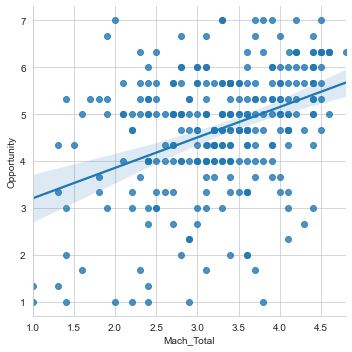

In [59]:
#H4. A. Machiavellianism (Mach) will be negatively related to an individual’s perception of an opportunity to commit an online scam.

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Mach_Total']), y=np.asarray(df_2['Opportunity'])))
sns.set_style('whitegrid')
sns.lmplot(x='Mach_Total',y='Opportunity',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['Mach_Total']).reshape(-1,1), np.asarray(df_2['Opportunity']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['Mach_Total']).reshape(-1,1), np.asarray(df_2['Opportunity']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (0.42981734613916406, 7.90730018710712e-15)
R^2 -  0.18474295104211402
Regression Coefficients: [[0.82579614]]


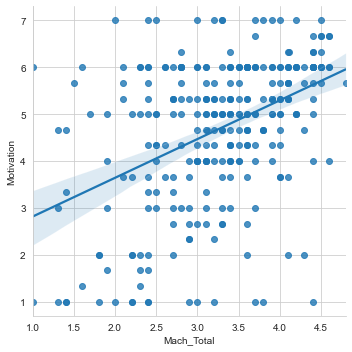

In [60]:
#H4. B. Mach will be positively related to an individuals’ motivation to commit an online scam.

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Mach_Total']), y=np.asarray(df_2['Motivation'])))
sns.set_style('whitegrid')
sns.lmplot(x='Mach_Total',y='Motivation',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['Mach_Total']).reshape(-1,1), np.asarray(df_2['Motivation']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['Mach_Total']).reshape(-1,1), np.asarray(df_2['Motivation']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (0.7165156584333355, 3.247163623717998e-48)
R^2 -  0.5133946887801561
Regression Coefficients: [[1.40836703]]


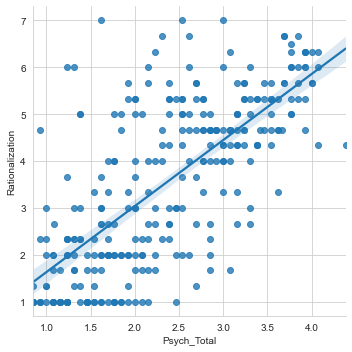

In [61]:
#H5. Psychopathy will be positively related to the willingness to rationalize an act of online fraud.

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Psych_Total']), y=np.asarray(df_2['Rationalization'])))
sns.set_style('whitegrid')
sns.lmplot(x='Psych_Total',y='Rationalization',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['Psych_Total']).reshape(-1,1), np.asarray(df_2['Rationalization']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['Psych_Total']).reshape(-1,1), np.asarray(df_2['Rationalization']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

Preason Correlation and p-value =  (0.8243918551392477, 3.8654563259132664e-75)
R^2 -  0.03133156779004209
Regression Coefficients: [[0.94750549]]


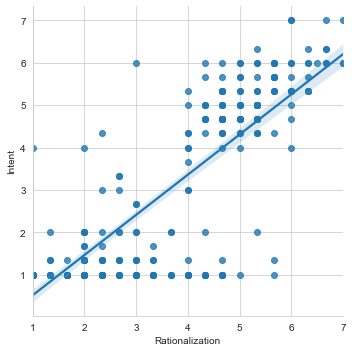

In [62]:
#H6: An individuals’ willingness to rationalize an act of fraud will be positively related with their intent to commit fraud.

print("Preason Correlation and p-value = ", pearsonr(x=np.asarray(df_2['Rationalization']), y=np.asarray(df_2['Intent'])))
sns.set_style('whitegrid')
sns.lmplot(x='Rationalization',y='Intent',data=df_2)
lm = LinearRegression()
lm.fit(np.asarray(df_2['Rationalization']).reshape(-1,1), np.asarray(df_2['Intent']).reshape(-1,1))
print("R^2 - ",lm.score(np.asarray(df_2['Psych_Total']).reshape(-1,1), np.asarray(df_2['Intent']).reshape(-1,1)))
print("Regression Coefficients:",lm.coef_)

In [63]:
#Save data to the file, we will read it to do structural equation modeling in R as it has better documentation online.
df_2.to_csv(r'cleaned_data.csv', index = False)